In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.99k/0.99k [00:00<00:00, 2.10MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arshid/iris-flower-dataset/versions/1


In [ ]:
import os

# List files in the downloaded path to see the directory structure
print(os.listdir(path))

# Assuming the csv is directly in the downloaded path, try reading again with the correct path
file_path = os.path.join(path, 'iris.csv')
try:
    df = pd.read_csv(file_path)
    display(df.head())
    display(df.info())
except FileNotFoundError:
    # If not found, try a common subdirectory name like 'dataset' or the dataset name itself
    file_path_subdir = os.path.join(path, 'iris-flower-dataset', 'iris.csv')
    try:
        df = pd.read_csv(file_path_subdir)
        display(df.head())
        display(df.info())
    except FileNotFoundError:
        print("Could not find 'iris.csv' in the expected locations.")


['IRIS.csv']
Could not find 'iris.csv' in the expected locations.


In [ ]:
import os

file_path = os.path.join(path, 'IRIS.csv')
df = pd.read_csv(file_path)

display(df.head())
display(df.info())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [ ]:
features = df.drop('species', axis=1)
target = df['species']

display(features.head())
display(target.head())

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

display(features_pca)

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_pca)

display(features_tsne)

array([[-2.56235580e+01, -2.76526856e+00],
       [-2.83946457e+01, -3.26431966e+00],
       [-2.84523048e+01, -2.45013428e+00],
       [-2.90960083e+01, -3.47446465e+00],
       [-2.56469250e+01, -2.56795669e+00],
       [-2.36350098e+01, -4.06200314e+00],
       [-2.80660820e+01, -2.64937282e+00],
       [-2.64684639e+01, -3.26960826e+00],
       [-2.98112068e+01, -3.13771582e+00],
       [-2.79275436e+01, -3.39215994e+00],
       [-2.39853287e+01, -3.52737236e+00],
       [-2.72277946e+01, -3.55751181e+00],
       [-2.87691383e+01, -3.05070901e+00],
       [-2.98745728e+01, -2.31727648e+00],
       [-2.27410660e+01, -3.13108540e+00],
       [-2.25861588e+01, -3.59869456e+00],
       [-2.35047264e+01, -3.03342962e+00],
       [-2.56501541e+01, -3.04443622e+00],
       [-2.32480049e+01, -4.06992769e+00],
       [-2.46160831e+01, -2.93232512e+00],
       [-2.49007893e+01, -4.35983562e+00],
       [-2.49348717e+01, -3.39672709e+00],
       [-2.78000736e+01, -1.54817545e+00],
       [-2.

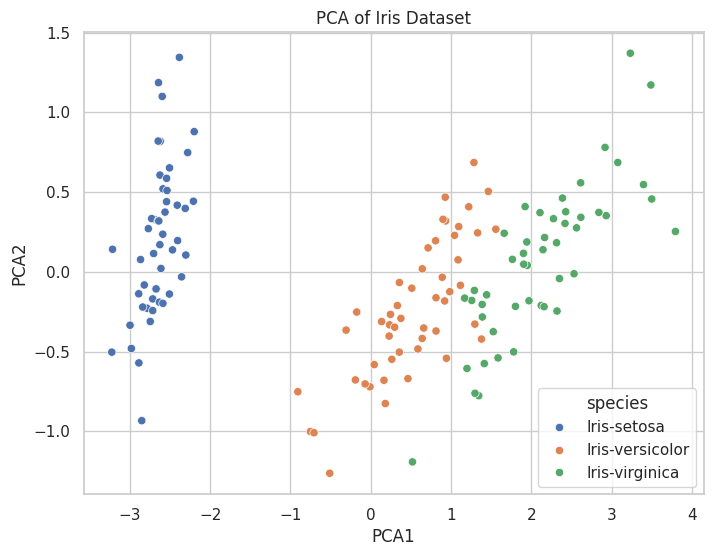

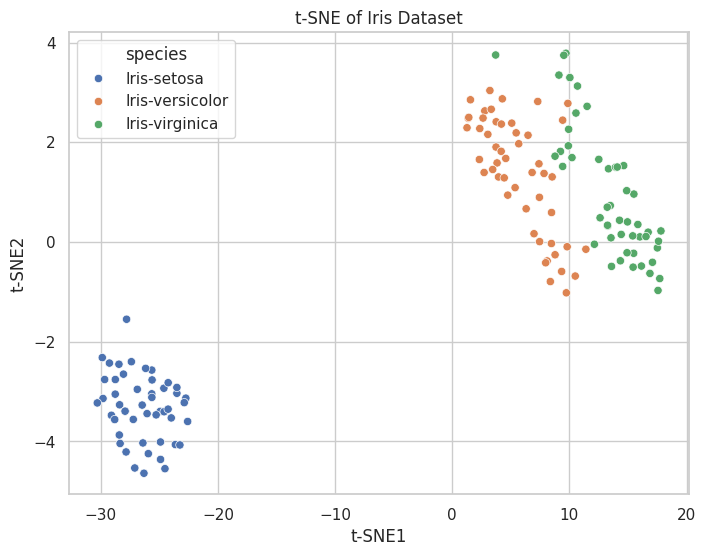

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame for PCA results
pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = target

# Create scatter plot for PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='species')
plt.title('PCA of Iris Dataset')
plt.show()

# Create DataFrame for t-SNE results
tsne_df = pd.DataFrame(features_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['species'] = target

# Create scatter plot for t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='t-SNE1', y='t-SNE2', hue='species')
plt.title('t-SNE of Iris Dataset')
plt.show()